# TRỰC QUAN HÓA DỮ LIỆU
## LAB1: MỐI QUAN HỆ DỮ LIỆU
## THÀNH VIÊN NHÓM
1. 19120545 - Lê Ngọc Khoa.
2. 19120559 - Hà Duy Lãm.
3. 19120677 - Nguyễn Diệp Minh Tiến.


### THÊM THƯ VIỆN

In [411]:
import requests
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import lxml.html as lh
import seaborn as sns

### Lấy dữ liệu hàng ngày

In [412]:
URL = 'https://www.worldometers.info/coronavirus/' 
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find(id='nav-tabContent')
table = table.find(id = 'nav-today')
table = table.find(id = '')
table = table.find(id = 'main_table_countries_today')
table_rows = table.find_all('tr')
l = [] 
for tr in table_rows: 
    td = tr.find_all('td')
    row = [tr.text for tr in td]
    if (len(row) == 0 ):
        continue  
    row = row[:10] 
    l.append(row) 

dataset = pd.DataFrame(l, columns=["Ranking","Country","Total Cases","New Cases","Total Deaths","New Deaths","Total Recoverd","New Recoverd","Active Cases","Serious Cases"])

### Lưu dữ liệu hàng ngày

In [413]:
import datetime
datestr = datetime.date.today().strftime("%Y%m%d")
dataset.to_csv('CoronaData_{}.csv'.format(datestr))
dataset

,Ranking,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recoverd,New Recoverd,Active Cases,Serious Cases
0,,\nNorth America\n,"98,656,294",,"1,462,943",,"94,348,717",,"2,844,634","7,207"
1,,\nAsia\n,"148,481,916","+109,375","1,425,433",+176,"126,417,346","+67,069","20,639,137","12,645"
2,,\nSouth America\n,"56,879,752",,"1,294,985",,"53,031,574",,"2,553,193","10,756"
3,,\nEurope\n,"192,060,650","+1,397","1,821,494",+5,"178,301,833","+173,890","11,937,323","8,681"
4,,\nOceania\n,"7,385,763","+48,560","10,872",+67,"6,858,416","+9,096","516,475",170
...,...,...,...,...,...,...,...,...,...,...
239,,Total:,"192,060,650","+1,397","1,821,494",+5,"178,301,833","+173,890","11,937,323","8,681"
240,,Total:,"7,385,763","+48,560","10,872",+67,"6,858,416","+9,096","516,475",170
241,,Total:,"11,921,074",,"253,860",,"11,120,021",,"547,193",964
242,,Total:,721,,15,,706,,0,0


### Tiền xử lí dữ liệu

In [414]:
dataset.info()
def dataframeCleaner(dataset):
  
    for columnname in dataset: 
        temp = []     
        for column in dataset[columnname]:   
            column = str(column)
            column = column.replace(',','') 
            column = column.replace('+','') 
            try:   
                column = int(column)
            except:
                pass
            
            temp.append(column)
        dataset[columnname] = temp
                 
    dataset = dataset.replace('N/A', '', regex=True)
    dataset = dataset.replace(r'^\s*$', 0, regex=True)  
    dataset.replace(['\n'], '', regex=True, inplace=True)
    dataset.replace([','], '', regex=True, inplace=True)
    return dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Ranking         244 non-null    object
 1   Country         244 non-null    object
 2   Total Cases     244 non-null    object
 3   New Cases       244 non-null    object
 4   Total Deaths    244 non-null    object
 5   New Deaths      244 non-null    object
 6   Total Recoverd  244 non-null    object
 7   New Recoverd    244 non-null    object
 8   Active Cases    244 non-null    object
 9   Serious Cases   244 non-null    object
dtypes: object(10)
memory usage: 19.2+ KB


### Lưu dữ liệu sau xử lí

In [415]:
dataset = dataframeCleaner(dataset) 
datestr = datetime.date.today().strftime("%Y%m%d")
dataset.to_csv('CoronaData_{}_Daxuli.csv'.format(datestr))
dataset

,Ranking,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recoverd,New Recoverd,Active Cases,Serious Cases
0,0,North America,98656294,0,1462943,0,94348717,0,2844634,7207
1,0,Asia,148481916,109375,1425433,176,126417346,67069,20639137,12645
2,0,South America,56879752,0,1294985,0,53031574,0,2553193,10756
3,0,Europe,192060650,1397,1821494,5,178301833,173890,11937323,8681
4,0,Oceania,7385763,48560,10872,67,6858416,9096,516475,170
...,...,...,...,...,...,...,...,...,...,...
239,0,Total:,192060650,1397,1821494,5,178301833,173890,11937323,8681
240,0,Total:,7385763,48560,10872,67,6858416,9096,516475,170
241,0,Total:,11921074,0,253860,0,11120021,0,547193,964
242,0,Total:,721,0,15,0,706,0,0,0


### Lấy dữ liệu ngày 4/5/2022 để trực quan

In [416]:
dataset = pd.read_csv('CoronaData_20220505_Daxuli.csv')
dataset

,Unnamed: 0,Ranking,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recoverd,New Recoverd,Active Cases,Serious Cases
0,0,0,North America,98656294,0,1462943,0,94348717,0,2844634,7207
1,1,0,Asia,148481916,109375,1425433,176,126417346,67069,20639137,12645
2,2,0,South America,56879752,0,1294985,0,53031574,0,2553193,10756
3,3,0,Europe,192060650,1397,1821494,5,178301833,173890,11937323,8681
4,4,0,Oceania,7385763,48560,10872,67,6858416,9096,516475,170
...,...,...,...,...,...,...,...,...,...,...,...
239,239,0,Total:,192060650,1397,1821494,5,178301833,173890,11937323,8681
240,240,0,Total:,7385763,48560,10872,67,6858416,9096,516475,170
241,241,0,Total:,11921074,0,253860,0,11120021,0,547193,964
242,242,0,Total:,721,0,15,0,706,0,0,0


### Pie chart

   Total Deaths  Total Recoverd  Active Cases
7       6269602       470078613      39037955


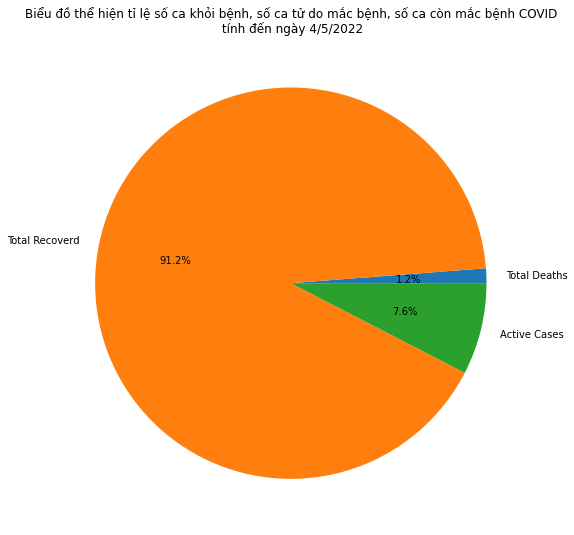

In [426]:
labels = ["Total Deaths","Total Recoverd","Active Cases"]
world_total = dataset[dataset["Country"] == "World"][labels]
world_data = world_total[labels].values[0].tolist()
print(world_total)
world_series = pd.Series(world_data,index = labels, name = "") 
plot = world_series.plot.pie(figsize = (9,9),autopct='%1.1f%%',subplots = True)
plt.title('Biểu đồ thể hiện tỉ lệ số ca khỏi bệnh, số ca tử do mắc bệnh, số ca còn mắc bệnh COVID\n tính đến ngày 4/5/2022')

In [418]:
df = dataset
df = dataframeCleaner(df)
df = df.drop(df.head(8).index)
df = df.drop(df.tail(8).index)
df

,Unnamed: 0,Ranking,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recoverd,New Recoverd,Active Cases,Serious Cases
8,8,1,USA,83356490,0,1023513,0,80836418,0,1496559,1655
9,9,2,India,43091393,0,523975,0,42547699,0,19719,698
10,10,3,Brazil,30502501,0,663816,0,29602372,0,236313,8318
11,11,4,France,28805690,0,146376,0,27301021,0,1358293,1511
12,12,5,Germany,25116363,0,136405,0,23000500,159200,1979458,1279
...,...,...,...,...,...,...,...,...,...,...,...
231,231,224,Niue,9,0,0,0,8,0,1,0
232,232,225,Micronesia,7,0,0,0,1,0,6,0
233,233,226,Nauru,5,0,0,0,3,0,2,0
234,234,227,Saint Helena,2,0,0,0,2,0,0,0


### Bar chart

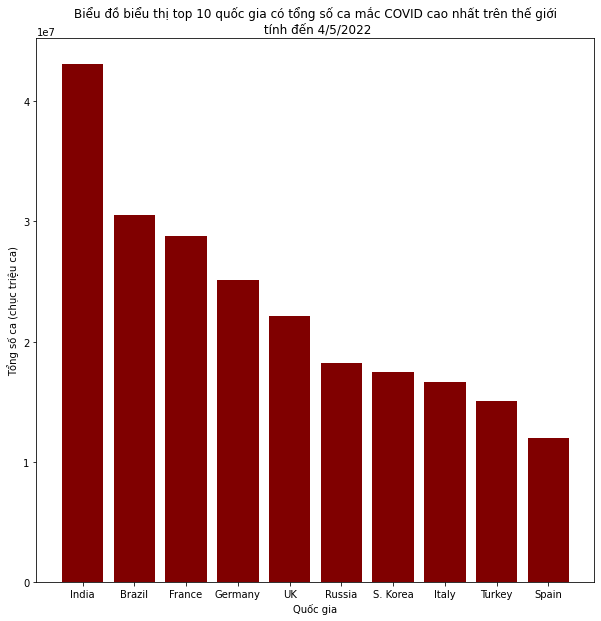

In [419]:
total_case_death_reco = df
features = ["Country","Total Cases","Total Deaths","Total Recoverd","Active Cases","Serious Cases"]
df_total_case_death_reco=total_case_death_reco[features]
df_total_case_death_reco = df_total_case_death_reco.drop(df.head(1).index)
df_total_case_death_reco=df_total_case_death_reco.head(10)

plt.bar('Country' , 'Total Cases',data=df_total_case_death_reco,color ='maroon')
plt.ylabel('Tổng số ca (chục triệu ca)')
plt.xlabel('Quốc gia')
plt.title('Biểu đồ biểu thị top 10 quốc gia có tổng số ca mắc COVID cao nhất trên thế giới\n tính đến 4/5/2022')
plt.show()



### Dot and line chart

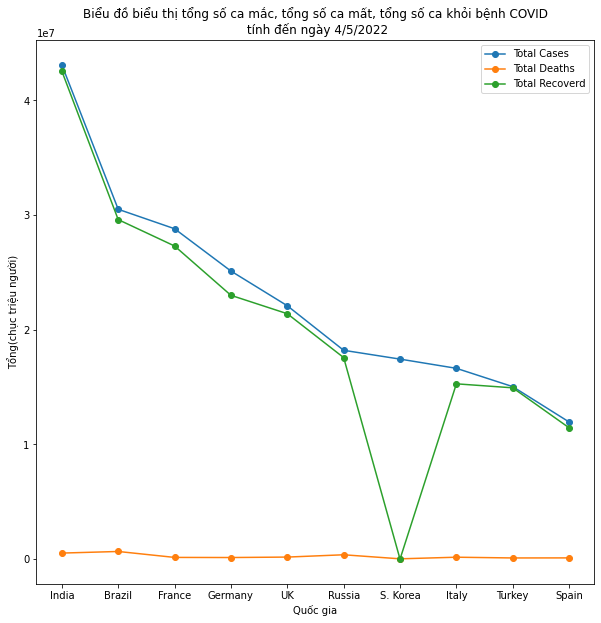

In [420]:
plt.rcParams["figure.figsize"] = [10,10]
plt.xlabel('Quốc gia')
plt.ylabel('Tổng(chục triệu người)')
plt.title('Biểu đồ biểu thị tổng số ca mắc, tổng số ca mất, tổng số ca khỏi bệnh COVID\n tính đến ngày 4/5/2022')
plt.plot( 'Country', 'Total Cases', data=df_total_case_death_reco, linestyle='-', marker='o')
plt.plot( 'Country', 'Total Deaths', data=df_total_case_death_reco, linestyle='-', marker='o')
plt.plot( 'Country', 'Total Recoverd', data=df_total_case_death_reco, linestyle='-', marker='o')
plt.legend()


### Cluster heat map

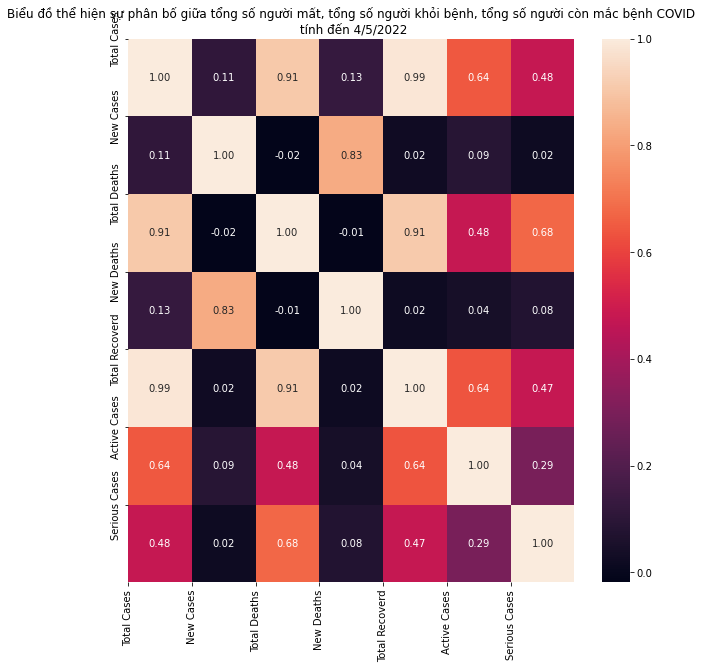

In [430]:
def heatMap(df):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corr,  annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.title('Biểu đồ thể hiện mối quan hệ về các thông số bệnh COVID\n tính đến 4/5/2022')
    plt.show()
data = df
features = ["Total Cases","New Cases","Total Deaths","New Deaths","Total Recoverd","Active Cases","Serious Cases"]
corr_data = data[features]
heatMap(corr_data) 


               Total Deaths  Total Recoverd  Active Cases
Country                                                  
North America       1462943        94348717       2844634
Asia                1425433       126417346      20639137
South America       1294985        53031574       2553193
Europe              1821494       178301833      11937323
Oceania               10872         6858416        516475
Africa               253860        11120021        547193


Text(0.5, 1.0, 'Biểu đồ thể hiện sự phân bố giữa tổng số người mất, tổng số người khỏi bệnh, tổng số người còn mắc bệnh COVID\n tính đến 4/5/2022')

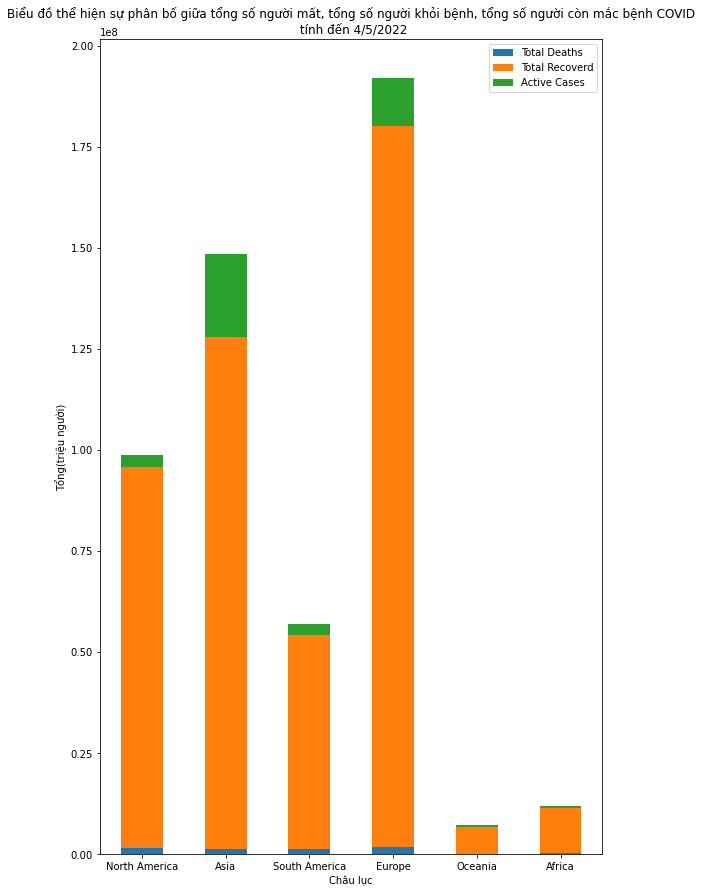

In [422]:
df1 = dataset[0:6]
df1
indexs = ["Country","Total Deaths", "Total Recoverd", "Active Cases"]
large_filter = df1[indexs].set_index("Country")
print(large_filter)
plot = large_filter.plot.bar(stacked=True,figsize = (9,15),rot=0)
plt.xlabel('Châu lục')
plt.ylabel('Tổng(triệu người)')
plt.title('Biểu đồ thể hiện sự phân bố giữa tổng số người mất, tổng số người khỏi bệnh, tổng số người còn mắc bệnh COVID\n tính đến 4/5/2022')
